In [1]:
# A simple CNN for digits recognition in tensorflow and keras (~99% accuracy)
%matplotlib inline
from tensorflow.python import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# training set size
TRAIN_SIZE = 60000

# load train and eval data
((train_data, train_labels), (eval_data, eval_labels)) = mnist.load_data()

# normalize
train_data = train_data / np.float32(255)
eval_data = eval_data / np.float32(255)

# reshape for ConvNet
# 60k training set and 10k test set
train_labels = train_labels[:TRAIN_SIZE]
X_train = train_data[:TRAIN_SIZE, :, :]
X_train = X_train.reshape(TRAIN_SIZE, 28, 28, 1)
X_eval = eval_data.reshape(10000, 28, 28, 1)

In [3]:
# one-hot encoding
y_train = tf.keras.utils.to_categorical(train_labels, num_classes=10)
y_eval = tf.keras.utils.to_categorical(eval_labels, num_classes=10)

In [4]:
# describe the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
____

In [5]:
# train
history = model.fit(X_train, y_train, epochs=8, batch_size=128, verbose=1)

Epoch 1/8
60000/60000 [==============================] - 31s 514us/sample - loss: 0.4649 - acc: 0.8493
Epoch 2/8
60000/60000 [==============================] - 29s 482us/sample - loss: 0.1406 - acc: 0.9584
Epoch 3/8
60000/60000 [==============================] - 29s 476us/sample - loss: 0.1032 - acc: 0.9690
Epoch 4/8
60000/60000 [==============================] - 29s 484us/sample - loss: 0.0842 - acc: 0.9753
Epoch 5/8
60000/60000 [==============================] - 29s 477us/sample - loss: 0.0779 - acc: 0.9772
Epoch 6/8
60000/60000 [==============================] - 29s 486us/sample - loss: 0.0704 - acc: 0.9797
Epoch 7/8
60000/60000 [==============================] - 29s 478us/sample - loss: 0.0648 - acc: 0.9807
Epoch 8/8
60000/60000 [==============================] - 29s 481us/sample - loss: 0.0647 - acc: 0.9819


In [6]:
# evaluate using test data
eval_results = model.evaluate(X_eval, y_eval, batch_size=128)

10000/10000 [==============================] - 1s 98us/sample - loss: 0.0263 - acc: 0.9917


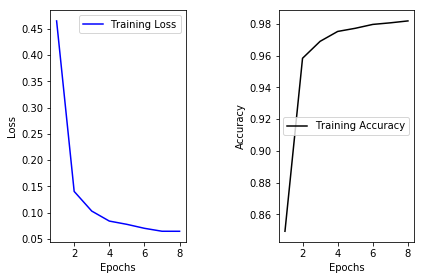

In [7]:
# plot
loss = history.history['loss']
acc = history.history['acc']
epochs = range(1, 9)

fig = plt.figure()
plt.subplot(121)
plt.subplots_adjust(wspace=5.0)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.tight_layout()
plt.plot(epochs, acc, 'k', label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

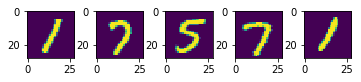

[1 7 5 7 1]


In [8]:
# random predict
idx = random.randint(0, 10000)
pred = model.predict(X_eval[idx:idx+5, :, :])

# show
fig = plt.figure()
for i in range(1, 6):
  fig.add_subplot(4, 5, i)
  plt.imshow(eval_data[idx+i-1])
plt.show()

labels = np.argmax(pred, axis=1)
print(labels)